# Compare Individualized Network Stats

In [1]:
from scipy.stats import ks_2samp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.spatial.distance import jensenshannon as jsd

import os
import warnings
import numpy as np
from scipy.stats import ks_2samp, gaussian_kde
from scipy.spatial.distance import jensenshannon
from matplotlib.patches import Patch
import matplotlib.pyplot as plt

from neurotools.transform.network import _jsd_metric, _ks_metric, _ks_demean_metric, _ks_normalize_metric

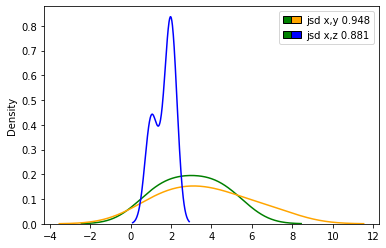

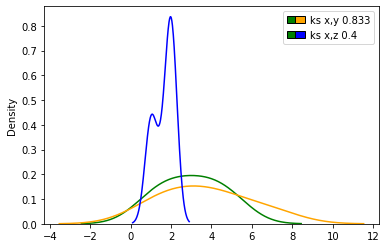

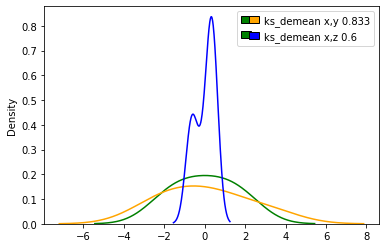

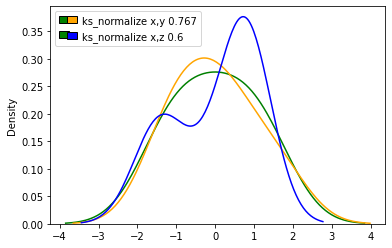

In [2]:
for func in [_jsd_metric, _ks_metric, _ks_demean_metric, _ks_normalize_metric]:
    
    fig, ax = plt.subplots()

    g1 = Patch(facecolor='green', edgecolor='black')
    g2 = Patch(facecolor='green', edgecolor='black')
    o = Patch(facecolor='orange', edgecolor='black')
    b = Patch(facecolor='blue', edgecolor='black')
    
    x = np.array([1, 2, 3, 4, 5.0]) 
    y = np.array([1, 2, 3, 4, 5, 7.0])
    z = np.array([1, 1, 2, 2, 2, 2.0, 2, 2, 1, 1.5])
    
    ax.legend(handles=[g1, g2, o, b],
              labels=['', '', f'{func.__name__.replace("_metric", "")[1:]} x,y {func(x, y):.03}',
                              f'{func.__name__.replace("_metric", "")[1:]} x,z {func(x, z):.03}'],
              ncol=2,
              handletextpad=0.5,
              handlelength=1,
              columnspacing=-0.7,
              loc=0,
              fontsize=10)

    if 'demean' in func.__name__:
        x -= np.mean(x)
        y -= np.mean(y)
        z -= np.mean(z)
        
    if 'normalize' in func.__name__:
        x  = (x - np.mean(x)) / np.std(x)
        y  = (y - np.mean(y)) / np.std(y)
        z  = (z - np.mean(z)) / np.std(z)

    sns.kdeplot(x, color='green')
    sns.kdeplot(y, color='orange')
    sns.kdeplot(z, color='blue')
    
    plt.savefig(f'/home/sage/example_{func.__name__}.png')
    plt.show()

In [3]:
_jsd_metric(x, y), _ks_metric(x, y), _ks_demean_metric(x, y), _ks_normalize_metric(x, y)

(0.947943815025771, 0.7666666666666666, 0.7666666666666666, 0.7666666666666666)

In [4]:
_jsd_metric(x, z), _ks_metric(x, z), _ks_demean_metric(x, z), _ks_normalize_metric(x, z)

(0.8811562877305981, 0.6, 0.6, 0.6)